#Implementación y visualización de una regresión lineal múltiple en Python


*   Andrea Catalina Fernández Mena 
*   A01197705



Utilizaremos la librería Pandas para cargar los datos en un DataFrame.

In [ ]:

import pandas as pd # importa la librería pandas y la asigna a la variable pd

Una vez mandando a llama la librería Pandas, se crea la variable datos_consumo para cargar el archivo con la función read_excel de la librería Pandas:



In [ ]:
datos_consumo = pd.read_excel('DatosSemana1a4.xlsx') # indicamos el nombre de nuestro archivo a ser leído

Posteriormente, se utilizará la función head() para comprobar que los datos se cargaron correctemente en el dataframe viendo los primeros 5 registros:

In [ ]:

datos_consumo.head()

,Fecha (dd/mm/aa),Momento,Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg),Fuente,Unnamed: 9,Unnamed: 10
0,2021-06-28,Desayuno,Melón (1 taza),53.0,26.97,0.30,1.31,25.0,https://www.fatsecret.com.mx/calor%C3%ADas-nut...,,NaN
1,2021-06-28,Desayuno,Platano,105.0,26.95,0.39,1.29,1.0,https://www.fatsecret.com.mx/calor%C3%ADas-nut...,,NaN
2,2021-06-28,Desayuno,Café con leche,135.0,12.36,5.51,8.81,126.0,https://www.fatsecret.com.mx/calor%C3%ADas-nut...,,NaN
3,2021-06-28,Desayuno,Galletas marav (3),64.0,11.00,1.75,1.00,80.0,https://www.fatsecret.com.mx/calor%C3%ADas-nut...,,NaN
4,2021-06-28,Comida,Pechuga de pollo,195.0,0.00,7.72,29.55,393.0,https://www.fatsecret.com.mx/calor%C3%ADas-nut...,,NaN


Una vez hecho esto, se elabora una breve exploración de nuestros datos para ver como se distribuyen:

In [ ]:
datos_consumo.groupby("Momento").count() # con la función groupby agrupamos los
 #datos de la columna Momento y con count() los contamos para obtener subtotales

,Fecha (dd/mm/aa),Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg),Fuente,Unnamed: 9,Unnamed: 10
Momento,,,,,,,,,,
Cena,65,65,65,65,65,65,65,65,65,0
Comida,99,99,99,99,99,99,99,99,99,1
Desayuno,93,93,93,93,93,93,93,93,93,0
Snack,4,4,4,4,4,4,4,4,4,0


Usamos la función describe() para obtener la estadística descriptiva y completar la exploración de nuestros datos:

In [ ]:

datos_consumo.describe()

,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,144.688123,20.342797,4.873755,6.167663,193.717241
std,144.529582,21.445593,7.756092,8.474819,321.365141
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,10.530000,0.300000,1.000000,5.000000
50%,105.000000,13.000000,1.730000,2.000000,80.000000
75%,150.000000,26.970000,5.510000,8.810000,155.000000
max,875.000000,181.500000,40.040000,47.000000,1706.000000


**Posteriormente al analisis de dichos datos desplegados con las funciones de arriba, se procede a la parte de selección de datos**

Creamos una variable datos para asignarle el DafaFrame que contendrá solo los datos que analizaremos, utilizamos la función iloc[ ] para seleccionar los elementos de acuerdo a su ubicación. Su sintaxis es iloc[<filas>, <columnas>]:

In [ ]:
datos_seleccionados = datos_consumo.iloc[:,3:8] # : selecciona todas las filas y 3:8(-1) seleccion columnas de la 4 la 7

datos_seleccionados # desplegamos el dataframe

,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
0,53.0,26.97,0.30,1.31,25.0
1,105.0,26.95,0.39,1.29,1.0
2,135.0,12.36,5.51,8.81,126.0
3,64.0,11.00,1.75,1.00,80.0
4,195.0,0.00,7.72,29.55,393.0
...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN


Con el uso de la función info() vemos la información completa de los datos del nuevo dataframe, ya solo debemos tener los valores numéricos.

In [ ]:

datos_seleccionados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calorías (kcal)     261 non-null    float64
 1   Carbohidratos (g)   261 non-null    float64
 2   Lípidos/grasas (g)  261 non-null    float64
 3   Proteína (g)        261 non-null    float64
 4   Sodio (mg)          261 non-null    float64
dtypes: float64(5)
memory usage: 40.0 MB


**Una vez que se hace una segregación de los datos, es necesario brincar a la siguiente etapa, la cuál consiste en una limpieza de los mismos**

Previo a proseguir con nuestro proceso, hay que limpiar un poco los datos utilizando las siguientes funciones:

In [ ]:

datos_seleccionados.isnull().values.any() # buscamos valores nulos y obtenemos 
#True o False dependiendo si hay o no

dataset = datos_seleccionados.dropna() # creamos un nuevo dataframe descartando 
#los valores nulos o vacíos de nuestro dataframe datos_seleccionados

dataset.isnull().sum() # validamos que no tenemos valores nulos en ninguna 
#columna, todos deben dar cero

Calorías (kcal)       0
Carbohidratos (g)     0
Lípidos/grasas (g)    0
Proteína (g)          0
Sodio (mg)            0
dtype: int64

**Una vez realizado lo anterior, se puede proceder a la fase de probar datos**

El siguiente paso es asignar los atributos a las variables en nuestros datos. La variable X contiene los atributos de entrada y la variable y los atributos de salida:

In [ ]:
dataset.columns # vemos los nombres de nuestras columnas para asignarlos a las variables

X = dataset[['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']].values # variables independientes

y = dataset['Calorías (kcal)'].values # variable dependiente

Ahora dividimos nuestros datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%). Con los datos de entrenamiento realizamos el aprendizaje automático y con los datos de prueba realizamos la validación:

In [ ]:
from sklearn.model_selection import train_test_split # importamos la herramienta para dividir los datos de SciKit-Learn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # asignación de los datos 80% para entrenamiento y 20% para prueba

NameError: ignored

**Una vez que probamos que los datos son correctos, podemoos proceder a modelarlos**

De la librería SciKit-Learn importamos  la clase de regresión lineal y crearemos un objeto de esa clase, que será nuestro modelo de regresión lineal:

In [ ]:
from sklearn.linear_model import LinearRegression # importamos la clase de regresión lineal

modelo_regresion = LinearRegression() # modelo de regresión

Ya con el modelo, utilizaremos la función fit() para "ajustar" el modelo a nuestro conjunto de datos. Esto permite al modelo "estudiar" nuestros datos y "aprender" de ellos:

In [ ]:
modelo_regresion.fit(X_train, y_train) # aprendizaje automático con base en nuestros datos

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

En este punto, el algorítmo ya ha aprendido cuales son los coeficientes de X óptimos para satisfacer el modelo. Para verlos copiamos el siguiente código:

In [ ]:
x_columns = ['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']
coeff_df = pd.DataFrame(modelo_regresion.coef_, x_columns, columns=['Coeficientes'])
coeff_df # despliega los coefientes y sus valores; por cada unidad del coeficente, su 
#impacto en las calorías será igual a su valor

,Coeficientes
Carbohidratos (g),4.007088
Lípidos/grasas (g),9.079170
Proteína (g),4.176858
Sodio (mg),0.000958


Vemos los coeficientes de cada variable; en este caso notamos como el Sodío tiene un impacto no significativo en la cantidad de calorías al tener un coeficiente sumamente pequeño. 

Ahora bien, ya que emos creado nuestro modelo y lo hemos entrenado, es hora de probar el modelo con nuestro conjunto de datos de prueba:

In [ ]:
y_pred = modelo_regresion.predict(X_test) # probamos nuestro modelo con los valores de prueba

Revisemos la diferencia entre los valores actuales y los valores de predicción en la comparación, este código será programado para poder observar  25 valores actuales, de predicción y la diferencia en cantidad las calorías calculadas por nuestro modelo:

In [ ]:
validacion = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred, 'Diferencia': y_test-y_pred }) # creamos un dataframe con los valores actuales y los de predicción

muestra_validacion = validacion.head(25) # elegimos una muestra con 25 valores 

muestra_validacion # desplegamos esos 25 valores 

,Actual,Predicción,Diferencia
0,444.0,436.810689,7.189311
1,64.0,57.330071,6.669929
2,58.8,59.783162,-0.983162
3,367.0,371.198840,-4.198840
4,74.0,74.393870,-0.393870
5,107.0,113.105929,-6.105929
6,277.0,276.881963,0.118037
7,53.0,109.400601,-56.400601
8,67.0,60.750645,6.249355
9,53.0,109.400601,-56.400601


Usamos la función describe() para obtener la estadística descriptiva de la columna Diferencia:

In [ ]:
validacion["Diferencia"].describe()

count    53.000000
mean     -0.659957
std      16.525142
min     -56.400601
25%       0.118037
50%       5.417274
75%       6.667465
max       8.569530
Name: Diferencia, dtype: float64

Ahora calcularemos el coeficiente de determinación R2 para comprobar la precisión de nuestro modelo, mientras mayor sea el R2, mejor será el ajuste del modelo a los datos. Nuestro objetivo es un valor lo más cercano a 1 (100%), que nos indica que tanto se ajusta el modelo a nuestros datos, es decir, que porcentaje de calorías explicado por la regresión. 

In [ ]:

from sklearn.metrics import r2_score # importamos la métrica R cuadrada (coeficiente de determinación)

r2_score(y_test, y_pred) # ingresamos nuestros valores reales y calculados para obterner la R2

0.982527524997535

**En este punto ya cha sido creado con éxito un modelo de regresión lineal multiple, robusto y funcional.**

**Ahora bien, para concluir el análisis, será necesario comenzar con la visualización de los datos mismos**

Ahora toca realizar los gráficos para la visualización de los datos para hacer la comparación de valores actuales y de predicción y estimar de manera visual que tan preciso o no es nuestro modelo para calcular calorías. 
Para esto importamos la librería matplotlib, de la cuál, podemos obtener  una predicción bastante acertada al no haber mucha diferencia entre los valores actuales de las calorías y los valores calculados:

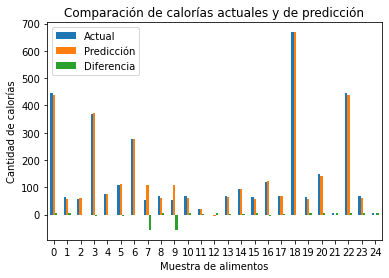

In [ ]:
import matplotlib.pyplot as plt # importamos la librería que nos permitirá graficar

muestra_validacion.plot.bar(rot=0)  # creamos un gráfico de barras con el dataframe que contiene nuestros datos actuales y de predicción

plt.title("Comparación de calorías actuales y de predicción") # indicamos el título del gráfico

plt.xlabel("Muestra de alimentos") # indicamos la etiqueta del eje de las x, los alimentos

plt.ylabel("Cantidad de calorías") # indicamos la etiqueta del eje de las y, la cantidad de calorías

plt.show() # desplegamos el gráfico